### Random Forest Model for Twitter Bot Account Detection

## Import libraries

In [223]:
import pandas as pd
import numpy as np
import seaborn as sns
import shap

## Load Dataset

In [224]:
df = pd.read_csv('dataset.csv')
df.head()

,user_id,screen_name,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers_ratio,...,freq_of_tweets,identical_tweets_ratio,avg_replies_per_tweet,avg_urls_per_tweet,avg_likes_per_tweet,possibly_sensitive,profile_image_url,profile_banner_url,is_profile_image_valid,followers_to_likes_ratio
0,1217628182611927040,boazbaraktcs,0,4.849,1,0,0.000,458,18518,0.025,...,1549.392,0.0,1.560,0.260,35.520,0,1,1,0,521.340
1,36741729,Matthew_Brody,1,15.559,0,0,0.000,615,486,1.265,...,331.641,0.0,0.000,0.000,0.000,0,1,1,0,0.000
2,1519144464,NikhilSewdass,0,11.433,0,0,0.933,409,191,2.141,...,121.141,0.0,0.000,0.000,1.000,0,1,1,0,191.000
3,15211869,jamie_love,0,16.411,1,0,0.000,2617,11131,0.235,...,4123.637,0.0,1.099,0.383,4.123,0,1,1,0,2699.434
4,848975226,fjsantiagoarcos,0,12.148,0,0,0.000,251,116,2.164,...,56.717,0.0,1.000,0.667,7.667,0,1,1,0,15.130


In [225]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 27 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   user_id                         1030 non-null   int64  
 1   screen_name                     1030 non-null   object 
 2   is_bot                          1030 non-null   int64  
 3   account_age                     1030 non-null   float64
 4   is_blue_verified                1030 non-null   int64  
 5   is_verified                     1030 non-null   int64  
 6   profile_description_sentiment   771 non-null    float64
 7   following_count                 1030 non-null   int64  
 8   followers_count                 1030 non-null   int64  
 9   following_to_followers_ratio    1030 non-null   float64
 10  normal_to_fast_followers_ratio  1030 non-null   int64  
 11  tweets_count                    1030 non-null   int64  
 12  likes_count                     10

In [226]:
df.isnull().sum()

user_id                             0
screen_name                         0
is_bot                              0
account_age                         0
is_blue_verified                    0
is_verified                         0
profile_description_sentiment     259
following_count                     0
followers_count                     0
following_to_followers_ratio        0
normal_to_fast_followers_ratio      0
tweets_count                        0
likes_count                         0
media_count                         0
avg_sentiment                       0
replies_ratio                       0
retweets_ratio                      0
freq_of_tweets                      0
identical_tweets_ratio              0
avg_replies_per_tweet               0
avg_urls_per_tweet                  0
avg_likes_per_tweet                 0
possibly_sensitive                  0
profile_image_url                   0
profile_banner_url                  0
is_profile_image_valid              0
followers_to

## Replace any null values with zero

In [227]:
df.fillna(0, inplace=True)

In [228]:
df.isnull().sum()

user_id                           0
screen_name                       0
is_bot                            0
account_age                       0
is_blue_verified                  0
is_verified                       0
profile_description_sentiment     0
following_count                   0
followers_count                   0
following_to_followers_ratio      0
normal_to_fast_followers_ratio    0
tweets_count                      0
likes_count                       0
media_count                       0
avg_sentiment                     0
replies_ratio                     0
retweets_ratio                    0
freq_of_tweets                    0
identical_tweets_ratio            0
avg_replies_per_tweet             0
avg_urls_per_tweet                0
avg_likes_per_tweet               0
possibly_sensitive                0
profile_image_url                 0
profile_banner_url                0
is_profile_image_valid            0
followers_to_likes_ratio          0
dtype: int64

In [229]:
df.head()

,user_id,screen_name,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers_ratio,...,freq_of_tweets,identical_tweets_ratio,avg_replies_per_tweet,avg_urls_per_tweet,avg_likes_per_tweet,possibly_sensitive,profile_image_url,profile_banner_url,is_profile_image_valid,followers_to_likes_ratio
0,1217628182611927040,boazbaraktcs,0,4.849,1,0,0.000,458,18518,0.025,...,1549.392,0.0,1.560,0.260,35.520,0,1,1,0,521.340
1,36741729,Matthew_Brody,1,15.559,0,0,0.000,615,486,1.265,...,331.641,0.0,0.000,0.000,0.000,0,1,1,0,0.000
2,1519144464,NikhilSewdass,0,11.433,0,0,0.933,409,191,2.141,...,121.141,0.0,0.000,0.000,1.000,0,1,1,0,191.000
3,15211869,jamie_love,0,16.411,1,0,0.000,2617,11131,0.235,...,4123.637,0.0,1.099,0.383,4.123,0,1,1,0,2699.434
4,848975226,fjsantiagoarcos,0,12.148,0,0,0.000,251,116,2.164,...,56.717,0.0,1.000,0.667,7.667,0,1,1,0,15.130


## Feature Engineering

### Drop irrelevent values to training

We want to drop user_id and screen_name as those are irrelevant to bot status. is_verified can be dropped since none of the accounts we are analyzing are organizations.

In [230]:
df.drop(columns=['user_id', 'screen_name',], inplace=True)

In [231]:
df.head()

,is_bot,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers_ratio,normal_to_fast_followers_ratio,tweets_count,...,freq_of_tweets,identical_tweets_ratio,avg_replies_per_tweet,avg_urls_per_tweet,avg_likes_per_tweet,possibly_sensitive,profile_image_url,profile_banner_url,is_profile_image_valid,followers_to_likes_ratio
0,0,4.849,1,0,0.000,458,18518,0.025,18518,7513,...,1549.392,0.0,1.560,0.260,35.520,0,1,1,0,521.340
1,1,15.559,0,0,0.000,615,486,1.265,486,5160,...,331.641,0.0,0.000,0.000,0.000,0,1,1,0,0.000
2,0,11.433,0,0,0.933,409,191,2.141,191,1385,...,121.141,0.0,0.000,0.000,1.000,0,1,1,0,191.000
3,0,16.411,1,0,0.000,2617,11131,0.235,11131,67673,...,4123.637,0.0,1.099,0.383,4.123,0,1,1,0,2699.434
4,0,12.148,0,0,0.000,251,116,2.164,116,689,...,56.717,0.0,1.000,0.667,7.667,0,1,1,0,15.130


## Create target variable

In [232]:
Y = df.is_bot
Y.head()

0    0
1    1
2    0
3    0
4    0
Name: is_bot, dtype: int64

## Drop the target variable : is_bot

Ensure model is trained on input variables and not outcomes

In [233]:
df.drop('is_bot', inplace=True, axis=1)

In [234]:
df.head()

,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers_ratio,normal_to_fast_followers_ratio,tweets_count,likes_count,...,freq_of_tweets,identical_tweets_ratio,avg_replies_per_tweet,avg_urls_per_tweet,avg_likes_per_tweet,possibly_sensitive,profile_image_url,profile_banner_url,is_profile_image_valid,followers_to_likes_ratio
0,4.849,1,0,0.000,458,18518,0.025,18518,7513,9619,...,1549.392,0.0,1.560,0.260,35.520,0,1,1,0,521.340
1,15.559,0,0,0.000,615,486,1.265,486,5160,24506,...,331.641,0.0,0.000,0.000,0.000,0,1,1,0,0.000
2,11.433,0,0,0.933,409,191,2.141,191,1385,157004,...,121.141,0.0,0.000,0.000,1.000,0,1,1,0,191.000
3,16.411,1,0,0.000,2617,11131,0.235,11131,67673,23019,...,4123.637,0.0,1.099,0.383,4.123,0,1,1,0,2699.434
4,12.148,0,0,0.000,251,116,2.164,116,689,952,...,56.717,0.0,1.000,0.667,7.667,0,1,1,0,15.130


In [235]:
X = df

In [236]:
X

,account_age,is_blue_verified,is_verified,profile_description_sentiment,following_count,followers_count,following_to_followers_ratio,normal_to_fast_followers_ratio,tweets_count,likes_count,...,freq_of_tweets,identical_tweets_ratio,avg_replies_per_tweet,avg_urls_per_tweet,avg_likes_per_tweet,possibly_sensitive,profile_image_url,profile_banner_url,is_profile_image_valid,followers_to_likes_ratio
0,4.849,1,0,0.000,458,18518,0.025,18518,7513,9619,...,1549.392,0.000,1.560,0.260,35.520,0,1,1,0,521.340
1,15.559,0,0,0.000,615,486,1.265,486,5160,24506,...,331.641,0.000,0.000,0.000,0.000,0,1,1,0,0.000
2,11.433,0,0,0.933,409,191,2.141,191,1385,157004,...,121.141,0.000,0.000,0.000,1.000,0,1,1,0,191.000
3,16.411,1,0,0.000,2617,11131,0.235,11131,67673,23019,...,4123.637,0.000,1.099,0.383,4.123,0,1,1,0,2699.434
4,12.148,0,0,0.000,251,116,2.164,116,689,952,...,56.717,0.000,1.000,0.667,7.667,0,1,1,0,15.130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1025,5.374,0,0,0.669,629,256,2.457,256,24,10,...,4.466,0.000,0.000,0.125,1.083,0,1,1,0,236.308
1026,7.510,0,0,0.000,94,262,0.359,262,222,136,...,29.561,0.005,0.250,0.400,9.350,0,1,0,0,28.021
1027,2.858,0,0,0.648,103,17,6.059,17,11,0,...,3.849,0.000,0.000,0.000,0.000,0,1,0,0,0.000
1028,4.208,0,0,0.000,435,79,5.506,79,21,0,...,4.990,0.029,0.000,1.190,0.238,0,1,1,0,331.800


## Split Data into Test & Training

In [237]:
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)

30% for testing, 70% for training, use random state to produce same outcomes

In [238]:
print('X_train: ', X_train.shape)
print('X_test: ', X_test.shape)
print('Y_train: ', Y_train.shape)
print('Y_test: ', Y_test.shape)

X_train:  (721, 24)
X_test:  (309, 24)
Y_train:  (721,)
Y_test:  (309,)


## Training Random Forest Classification on Training Set

In [239]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

criterion: how the decision trees are splitting nodes. either 'gini' or 'entropy'
n_estimators: the number of decision trees in the forest. we want ~100
max_samples: how many rows are being considered in each decision tree. we want all of them, leave empty

## Predicting Test Results

In [240]:
y_pred = model.predict(X_test)
y_pred

array([0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0,

## Confusion Matrix

In [241]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [242]:
cm = confusion_matrix(Y_test, y_pred)
print(cm)

[[103  54]
 [ 42 110]]


confusion matrix tells us the results of the testing
[ true positive - predicted bot accurately,   incorrectly predicted human
  false positive - incorrectly predicted bot, predicted human accurately  ]

In [243]:
round(accuracy_score(Y_test, y_pred), 3)

0.689

In [244]:
classification_report(Y_test, y_pred)

'              precision    recall  f1-score   support\n\n           0       0.71      0.66      0.68       157\n           1       0.67      0.72      0.70       152\n\n    accuracy                           0.69       309\n   macro avg       0.69      0.69      0.69       309\nweighted avg       0.69      0.69      0.69       309\n'

## Use SHAP to interpret the importance of features in the model (fine tuning)

In [245]:
explainer = shap.TreeExplainer(model)

In [246]:
shap_values = explainer.shap_values(X_test)

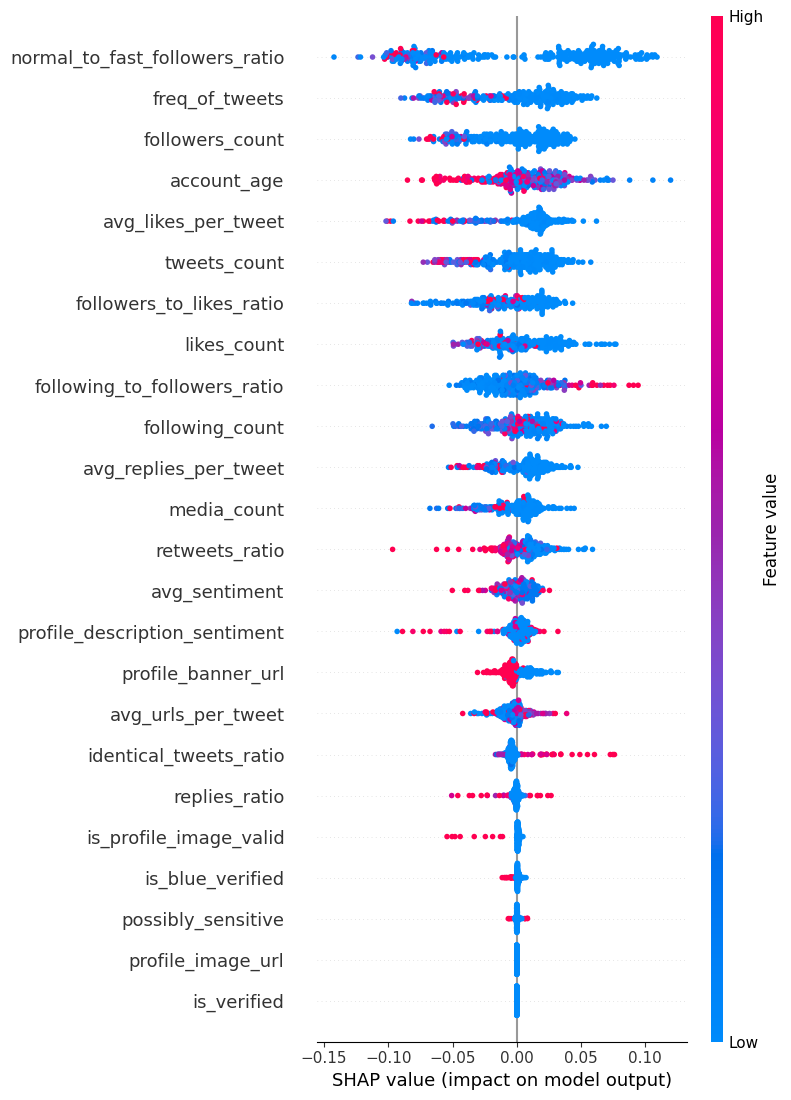

In [247]:
shap.summary_plot(shap_values[:,:,1], X_test, max_display=X_test.shape[1])

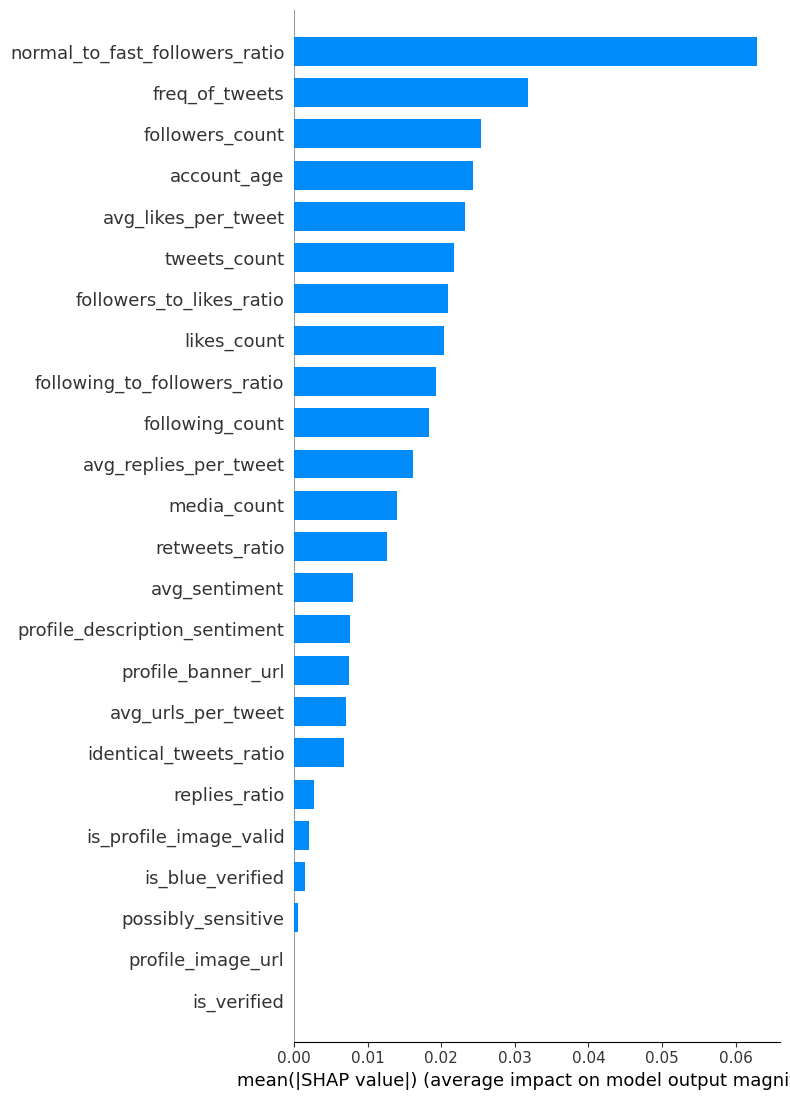

In [248]:
shap.summary_plot(shap_values[:,:,1], X_test, plot_type='bar', max_display=X_test.shape[1])

From these summary plots, we learn that is_verified, profile_image_url, is_profile_image_valid, is_blue_verified, possibly_sensitive, and replies_ratio are not impacting the model output.  

## Feature Engineering (2)

In [249]:
X.drop(columns=['is_verified', 'profile_image_url', 'normal_to_fast_followers_ratio'], inplace=True)

In [250]:
X.head()

,account_age,is_blue_verified,profile_description_sentiment,following_count,followers_count,following_to_followers_ratio,tweets_count,likes_count,media_count,avg_sentiment,...,retweets_ratio,freq_of_tweets,identical_tweets_ratio,avg_replies_per_tweet,avg_urls_per_tweet,avg_likes_per_tweet,possibly_sensitive,profile_banner_url,is_profile_image_valid,followers_to_likes_ratio
0,4.849,1,0.000,458,18518,0.025,7513,9619,707,0.229,...,0.580,1549.392,0.0,1.560,0.260,35.520,0,1,0,521.340
1,15.559,0,0.000,615,486,1.265,5160,24506,109,0.000,...,0.000,331.641,0.0,0.000,0.000,0.000,0,1,0,0.000
2,11.433,0,0.933,409,191,2.141,1385,157004,20,-0.267,...,0.970,121.141,0.0,0.000,0.000,1.000,0,1,0,191.000
3,16.411,1,0.000,2617,11131,0.235,67673,23019,3160,-0.191,...,0.283,4123.637,0.0,1.099,0.383,4.123,0,1,0,2699.434
4,12.148,0,0.000,251,116,2.164,689,952,4,0.616,...,0.970,56.717,0.0,1.000,0.667,7.667,0,1,0,15.130


## Retrain Model

In [251]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=0)
model = RandomForestClassifier(n_estimators = 50, criterion = 'entropy', random_state = 0)
model.fit(X_train, Y_train)

RandomForestClassifier(criterion='entropy', n_estimators=50, random_state=0)

## Test Results

In [252]:
y_pred = model.predict(X_test)
cm = confusion_matrix(Y_test, y_pred)
print('Confusion Matrix: ', cm)
print('Accuracy Score: ', round(accuracy_score(Y_test, y_pred), 3))
print('Classification Report: ', classification_report(Y_test, y_pred))

Confusion Matrix:  [[109  48]
 [ 35 117]]
Accuracy Score:  0.731
Classification Report:                precision    recall  f1-score   support

           0       0.76      0.69      0.72       157
           1       0.71      0.77      0.74       152

    accuracy                           0.73       309
   macro avg       0.73      0.73      0.73       309
weighted avg       0.73      0.73      0.73       309



## Save Model

In [253]:
import joblib
joblib.dump(model, 'bot_model.joblib')

['bot_model.joblib']